**LOGISTIC REGRESSION**

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

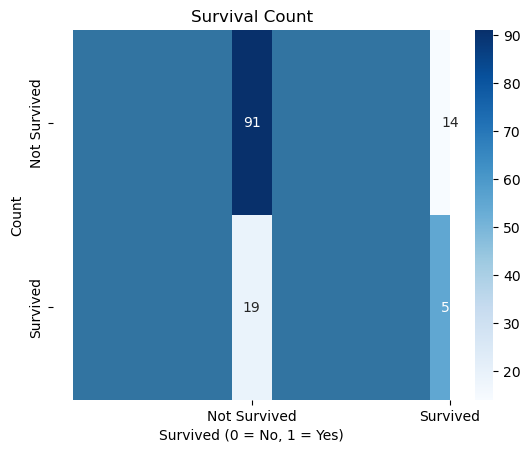

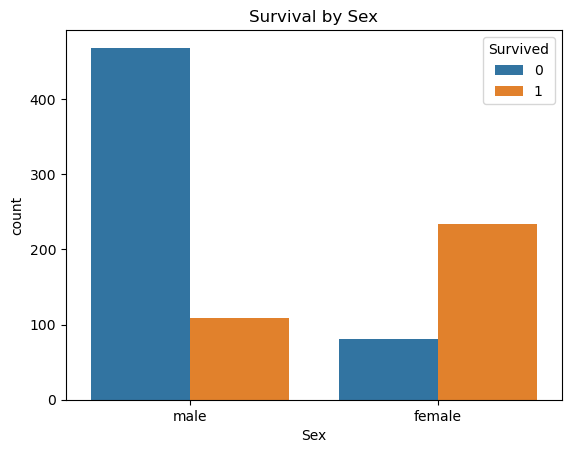

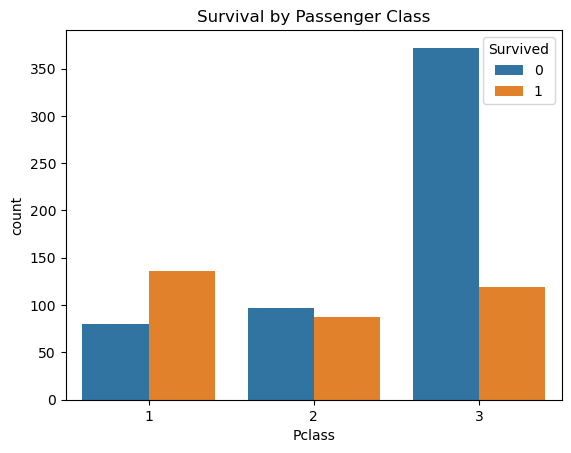

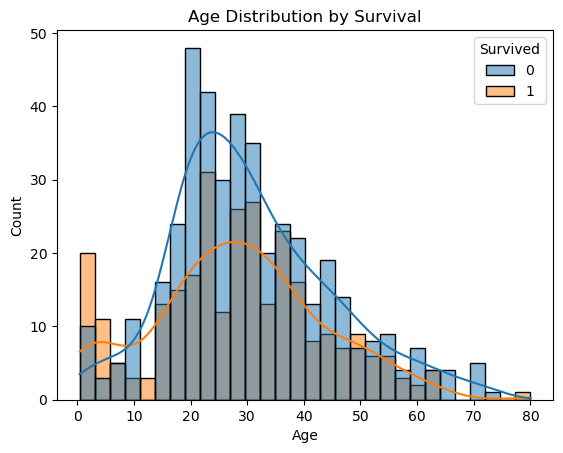

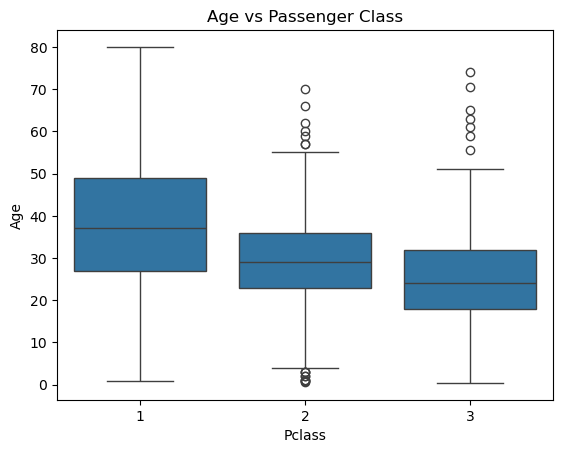

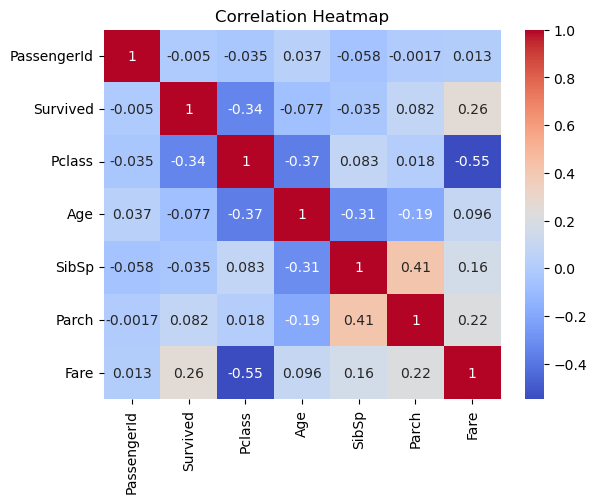

In [7]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset
train_df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Logistic Regression\\Titanic_train.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(train_df.head())

# Shape of the dataset
print("\nDataset shape:", train_df.shape)

# Data types and missing values
print("\nData Info:")
print(train_df.info())

# Summary statistics
print("\nSummary Statistics:")
print(train_df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(train_df.isnull().sum())

# Value counts for categorical features
print("\nCategorical feature distributions:")
print("Sex:\n", train_df["Sex"].value_counts())
print("\nEmbarked:\n", train_df["Embarked"].value_counts())

# Survival count
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Survival by Sex
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

# Survival by Pclass
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

# Age distribution by survival
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# Boxplot for age vs Pclass
sns.boxplot(data=train_df, x='Pclass', y='Age')
plt.title("Age vs Passenger Class")
plt.show()

# Heatmap for correlations (numerical features only)
# Drop non-numeric columns before computing correlation
numeric_df = train_df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'])  # Keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



**DATA PREPROCESSING**

In [8]:
# Load dataset
df = pd.read_csv("Titanic_train.csv")

# ----------------------------
# 1. Handling Missing Values (SAFE WAY)
# ----------------------------

# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' due to too many missing values
df = df.drop(columns=['Cabin'])

# ----------------------------
# 2. Encode Categorical Variables
# ----------------------------

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])           # male: 1, female: 0
df['Embarked'] = le.fit_transform(df['Embarked']) # C=0, Q=1, S=2

# ----------------------------
# 3. Drop Irrelevant Columns
# ----------------------------

df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# ----------------------------
# 4. Final Check
# ----------------------------

print("Final columns after preprocessing:\n", df.columns)
print("\nAny missing values left?\n", df.isnull().sum())
print("\nPreview of preprocessed data:")
print(df.head())


Final columns after preprocessing:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Any missing values left?
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Preview of preprocessed data:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


**MODEL BUILDING**

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8823680823680824


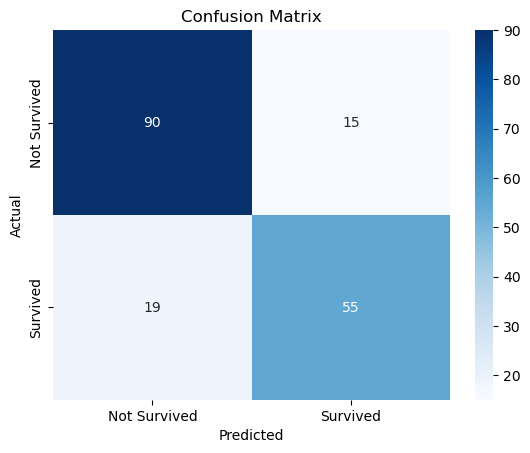

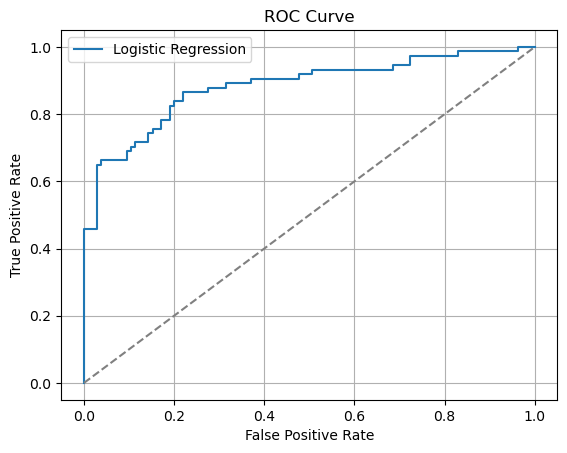

In [9]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Separate features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Step 2: Train-test split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]  # probability for ROC AUC

# Step 5: Evaluation metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))

# Step 6: Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


**MODEL EVALUATION**

Preprocess the Test Data
We'll make sure the test data is cleaned in the same way as the training data.

📊 Step 2: Evaluate Model Performance
We'll calculate:

Accuracy

Precision

Recall

F1 Score

ROC-AUC Score
And we'll plot the ROC Curve.

In [14]:
# 1. Load and preprocess the same way as in train_model.py
df = pd.read_csv("Titanic_train.csv")
df = df[["Survived", "Pclass", "Sex", "Age"]]

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]])

df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

# 2. Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Load the trained model
import pickle
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load Titanic dataset
df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Logistic Regression\\Titanic_train.csv")

# Select relevant features and target
df = df[["Survived", "Pclass", "Sex", "Age"]]

# Handle missing age values
imputer = SimpleImputer(strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]])

# Encode 'Sex' column
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

# Define features (X) and target (y)
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]


🔍 Model Evaluation Report:

Accuracy: 0.8156424581005587
Precision: 0.7971014492753623
Recall: 0.7432432432432432
F1 Score: 0.7692307692307693
ROC AUC Score: 0.8756113256113256

Full Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



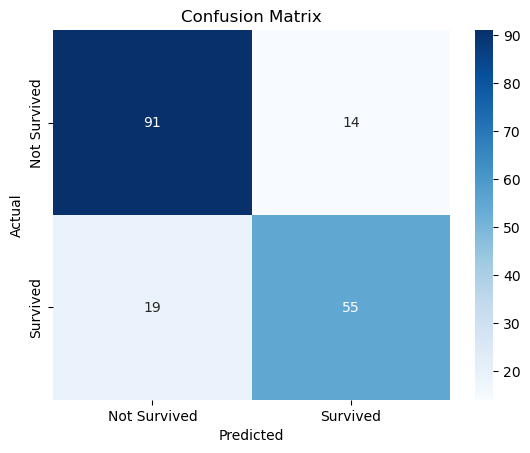

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data (you might have already done this)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("🔍 Model Evaluation Report:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Classification report
print("\nFull Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load your trained model
with open("logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

# Load the test dataset
test_df = pd.read_csv("Titanic_test.csv")

# Keep only the features used in training
test_df = test_df[["Pclass", "Sex", "Age"]]

# Handle missing 'Age' values
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

# Encode 'Sex' column
test_df["Sex"] = LabelEncoder().fit_transform(test_df["Sex"])

# Predict using the trained model
predictions = model.predict(test_df)
probabilities = model.predict_proba(test_df)[:, 1]  # Survival probability

# Add predictions to the test DataFrame
test_df["Predicted_Survival"] = predictions
test_df["Survival_Probability"] = probabilities

# Show sample output
print(test_df.head())

# Optionally save to CSV
test_df.to_csv("titanic_predictions.csv", index=False)
print("✅ Predictions saved to titanic_predictions.csv")


   Pclass  Sex   Age  Predicted_Survival  Survival_Probability
0       3    1  34.5                   0              0.077587
1       3    0  47.0                   0              0.409178
2       2    1  62.0                   0              0.096132
3       3    1  27.0                   0              0.097197
4       3    0  22.0                   1              0.611929
✅ Predictions saved to titanic_predictions.csv


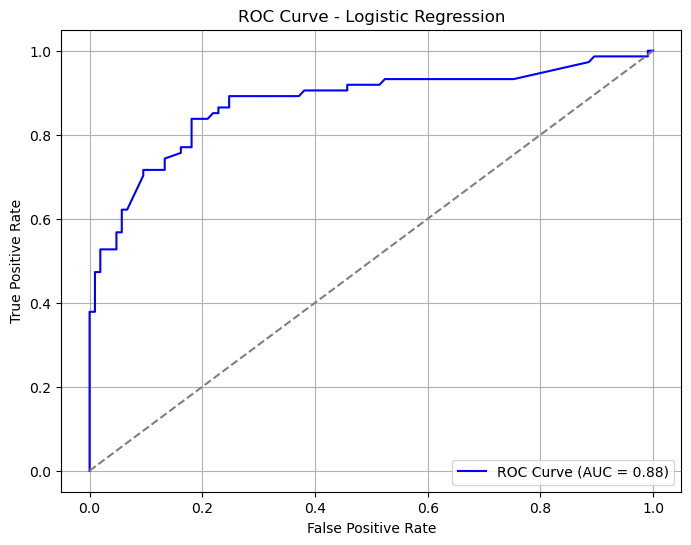

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**MODEL INTERPRETATION**

Logistic regression calculates the probability of survival based on this equation:

# Logistic regression equation:
# logit(p) = β0 + β1*x1 + β2*x2 + ... + βn*xn

Where:

	ppp is the probability of survival
	βi\beta_iβi are the coefficients
	xix_ixi are the features

In [8]:
# Feature names
feature_names = X.columns

# Coefficients
coefficients = model.coef_[0]

# Create a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


    Feature  Coefficient
5      Fare     0.002533
2       Age    -0.030430
4     Parch    -0.111822
6  Embarked    -0.218844
3     SibSp    -0.293865
0    Pclass    -0.930725
1       Sex    -2.596712


How to Interpret:
Positive Coefficient → Increases the probability of survival

Negative Coefficient → Decreases the probability of survival

Magnitude → Indicates strength of influence

"Feature Significance in Predicting Survival"
Most important features:

Sex — Most significant (Females had much higher survival rates)

Pclass — 1st class passengers had better survival odds

Fare — Associated with class and services; higher fare = higher survival

Age — Younger passengers had a better chance (especially children)

SibSp / Parch — Large families slightly reduced survival

Less important:

Embarked — Minor influence, possibly due to location differences

**STREAMLIT APP**

In [17]:
# train_model.py
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load training data
df = pd.read_csv("Titanic_train.csv")

# Select relevant features
df = df[["Survived", "Pclass", "Sex", "Age"]]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]])

# Encode 'Sex'
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])

# Features and target
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

# Train model
model = LogisticRegression()
model.fit(X, y)

# Save model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as logistic_model.pkl")


✅ Model trained and saved as logistic_model.pkl


import streamlit as st
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression

# Load model
with open('logistic_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Title
st.title("Titanic Survival Prediction")

# User input
gender = st.selectbox("Gender", ["male", "female"])
pclass = st.selectbox("Passenger Class (1 = First, 2 = Second, 3 = Third)", [1, 2, 3])
age = st.slider("Age", 0, 80, 25)

# Convert inputs
gender_num = 1 if gender == 'male' else 0
input_df = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [gender_num],
    'Age': [age]
})

# Prediction
prediction = model.predict(input_df)[0]
probability = model.predict_proba(input_df)[0][1]

# Output
if prediction == 1:
    st.success(f"🚢 Survived! Probability: {probability:.2f}")
else:
    st.error(f"💀 Did not survive. Probability: {probability:.2f}")


**TEST DATASET**

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Load the training dataset
train_df = pd.read_csv("Titanic_train.csv")

# Preprocessing
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# Split the training data for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Evaluate on validation set
y_pred = logreg_model.predict(X_val)
print("📊 Classification Report:")
print(classification_report(y_val, y_pred))

# Save the model
joblib.dump(logreg_model, "logreg_model.pkl")
print("✅ Logistic regression model saved as 'logreg_model.pkl'")


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

✅ Logistic regression model saved as 'logreg_model.pkl'


In [3]:
import pandas as pd
import joblib

# Load the test dataset
test_df = pd.read_csv("C:\\Users\\Akram siddiqui\\documents\\ExcelR\\Data science assignments\\Logistic Regression\\Titanic_train.csv")

# Preprocessing
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna('S')
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select same features used in training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test = test_df[features]
passenger_ids = test_df['PassengerId']

# Load trained logistic regression model
logreg_model = joblib.load("logreg_model.pkl")

# Predict survival
predictions = logreg_model.predict(X_test)

# Save predictions
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})
submission.to_csv("logreg_submission.csv", index=False)

print("✅ Submission file saved as logreg_submission.csv")


✅ Submission file saved as logreg_submission.csv
